In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ursse.phase_space_trajectory as pst
import ursse_cpp.sync_motion_sim as sm
from config_ursse import get_from_config, save_to_config

In [19]:
all_data_list = [
    pst.get_revolution_delay_df_one_gate('shift_02_28_2020', '1el_002.ptu'),
    pst.get_revolution_delay_df_one_gate('shift_02_28_2020', '1el_000.ptu'),
    pst.get_revolution_delay_df_one_gate('shift_02_28_2020', '1el_001.ptu'),
#     pst.get_revolution_delay_df_one_gate('shift_03_03_2020', '1el_filters_data_000.ptu'),
#     pst.get_revolution_delay_df_one_gate('shift_03_03_2020', '1el_filters_data_008.ptu'),
    pst.get_revolution_delay_df_one_gate('shift_03_05_2020', '1el_filters_000.ptu'),
    pst.get_revolution_delay_df_one_gate('shift_03_05_2020', '1el_filters_008.ptu'),
]

In [20]:
df = all_data_list[2]
df.revolution.max()/df.index.max()

303.80135620263263

In [21]:
spad_tts = 0

In [22]:
sz_df_list = [pst.get_sz_df(df0, spad_tts_ns=spad_tts) for df0 in all_data_list]

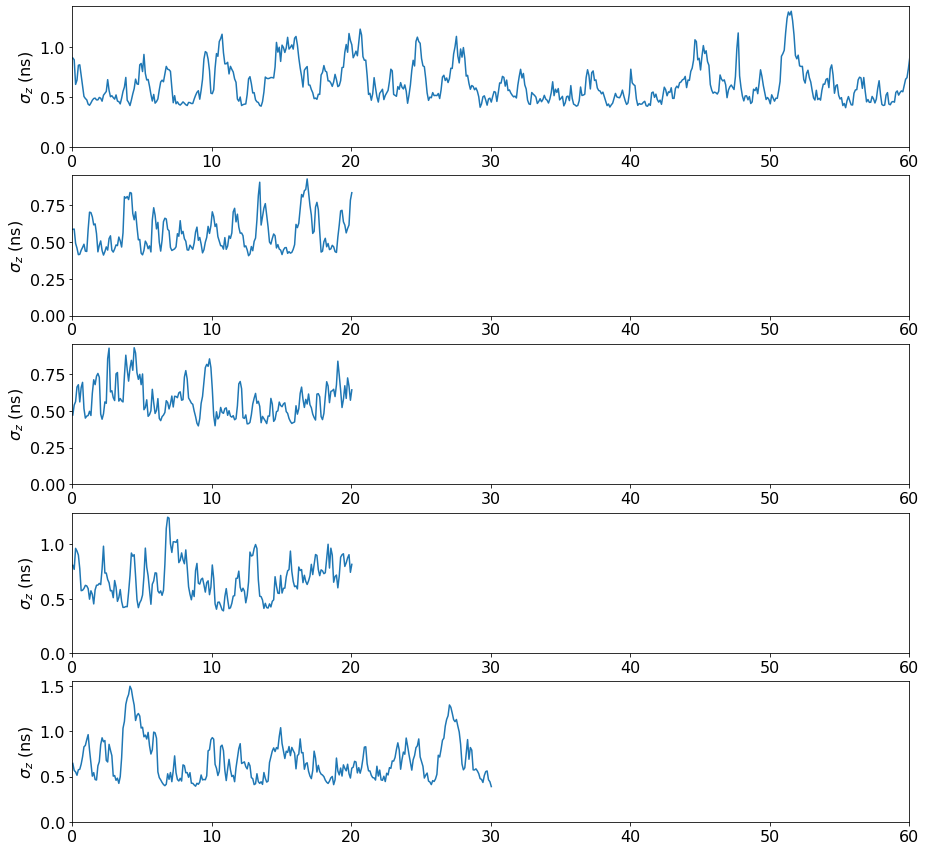

In [23]:
fig, axs = plt.subplots(len(sz_df_list), figsize=(15,15))
for sz_df,ax in zip(sz_df_list, axs):
    ax.plot(sz_df['time_sec'], sz_df['sz_ns'])
    ax.set_ylim(0,ax.get_ylim()[1])
    ax.set_xlim(0,60)
    ax.set_ylabel("$\sigma_z$ (ns)")

In [38]:
def get_conv(szs2, n):
    return (szs2.shift(n)*szs2).mean()

In [39]:
nrange = range(100)
convs = [
    [get_conv(szs.sz_ns**2, n) for n in nrange] for szs in sz_df_list
]

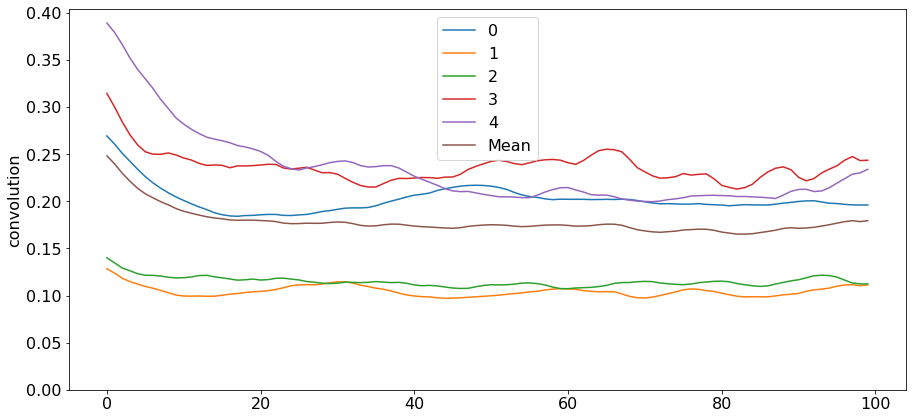

In [40]:
fig, ax = plt.subplots(figsize=(15,7))
for i,conv in enumerate(convs):
    ax.plot(conv, label=f"{i}")
    ax.set_ylabel("convolution")
ax.plot(np.mean(np.asarray(convs), axis=0), label="Mean")
ax.set_ylim(0,ax.get_ylim()[1])
ax.legend()
plt.show()

In [41]:
5*np.pi*1/137/np.sqrt(3)

0.06619705708884006